# Part II - Loan Data From Prosper
## by Ajoke Yusuf


## Investigation Overview
In this investigation I wanted to look at the distribution of the  main features (BorrowerAPR and LoanOriginalAmount) in the prosper loan dataset and also to check for any strong predictor features that influences the main features

## Dataset Overview

The main dataset contain 113937 row and 81 columns. After thoroughly cleaning my data, the dataset contains 83507 records abd 18 features.

The variables includes:

- ListingNumber: The number that uniquely identifies the listing to the public as displayed on the website.
- Term: The length of the loan expressed in months.
- LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, .
- ProsperRating: The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- BorrowerRate: The Borrower's interest rate for this loan.
- ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.
- Listing_category: The category of the listing that the borrower selected when posting their listing
- Occupation: The Occupation selected by the Borrower at the time they created the listing.
- EmploymentStatus:The employment status of the borrower at the time they posted the listing.
- EmploymentStatusDuration:The length in months of the employment status at the time the listing was created.
- IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- IncomeRange: The income range of the borrower at the time the listing was created.
- LoanOriginalAmount: The origination amount of the loan.
- BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- StatedMonthlyIncome:The monthly income the borrower stated at the time the listing was created.
- LoanOriginationYear: The date the loan was originated
- LoanMonth: The Month the loan was originated.




In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv(r'C:\Users\user\Downloads\prosperLoanData.csv')

In [3]:
#Selecting relevant columns
data=df[['ListingNumber','Term','LoanStatus','ProsperRating (Alpha)','BorrowerAPR','BorrowerRate','ProsperScore',
         'ListingCategory (numeric)','Occupation','EmploymentStatusDuration','EmploymentStatus',
         'IsBorrowerHomeowner','IncomeRange','LoanOriginalAmount','LoanOriginationDate','BorrowerState','StatedMonthlyIncome']]

In [4]:
#Creating a copy
loan_df=data.copy()

In [5]:
#renaming of the columns
loan_df.rename({'ProsperRating (Alpha)':'ProsperRating','ListingCategory (numeric)': 'ListingCategory'},axis=1,inplace=True)

In [6]:
loan_df["LoanOriginationDate"] = loan_df["LoanOriginationDate"].astype('datetime64[ns]')
loan_df['LoanOriginationYear'] = loan_df['LoanOriginationDate'].dt.year
loan_df['LoanOriginationMonth']= loan_df['LoanOriginationDate'].dt.month
loan_df.ListingNumber = loan_df.ListingNumber.astype(str)

In [7]:
# renaming of rows values in LoanOriginationMonth
def months_name(LoanOriginationMonth):
    if LoanOriginationMonth==1:
        return 'Jan'
    elif LoanOriginationMonth==2:
        return 'Feb'
    elif LoanOriginationMonth==3:
        return 'Mar'
    elif LoanOriginationMonth==4:
        return 'Apr'
    elif LoanOriginationMonth==5:
        return 'May'
    elif LoanOriginationMonth==6:
        return 'Jun'
    elif LoanOriginationMonth==7:
        return 'Jul'
    elif LoanOriginationMonth==8:
        return 'Aug'
    elif LoanOriginationMonth==9:
        return 'Sep'
    elif LoanOriginationMonth==10:
        return 'Oct'
    elif LoanOriginationMonth==11:
        return 'Nov'
    
    else:
        return 'Dec'
loan_df['LoanMonth']= loan_df['LoanOriginationMonth'].apply(months_name)

In [8]:
# convert IsBorrowerHomeowner,EmploymentStatus,LoanStatus,LoanMonth,ProsperRating,ProsperScore,LoanOriginationYear and IncomeRange into ordered categorical types
ordinal_var_dict = {'IsBorrowerHomeowner': [True, False],
                    'EmploymentStatus': ['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
                                         'Not employed', 'Part-time', 'Retired'],
                    'LoanStatus': ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted', 'Chargedoff', 
                              'Past Due (16-30 days)','Cancelled','Past Due (61-90 days)', 'Past Due (31-60 days)',
                              'Past Due (91-120 days)','FinalPaymentInProgress','Past Due (>120 days)'],
                    'LoanMonth': ['Mar', 'Nov', 'Sep', 'Dec', 'Apr', 'May', 'Jan', 'Jul', 'Oct','Feb', 'Jun', 'Aug'],
                    'ProsperRating': ['A', 'D', 'B', 'E', 'C', 'AA', 'HR'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                    'LoanOriginationYear': [2009, 2010, 2011, 2012, 2013, 2014],
                    'IncomeRange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loan_df[var] = loan_df[var].astype(ordered_var)

In [9]:
#Dropping of columns
loan_df.drop(['LoanOriginationDate','LoanOriginationMonth'], axis=1,inplace=True)

## Distribution of BorrowerAPR
The distribution is unimodal with the peak values around 0.35%

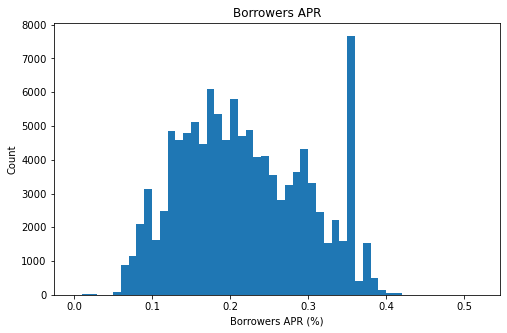

In [10]:
#further investigation
binsize = 0.01
bins = np.arange(0, loan_df['BorrowerAPR'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrowers APR (%)')
plt.ylabel('Count')
plt.title('Borrowers APR')
plt.show()

## Distribution of Loan Original Amount

The distribution is TriModal having peak values around 5k,10k,15k ($). This clearly explains that most loan collected were around the ranges of the peak value

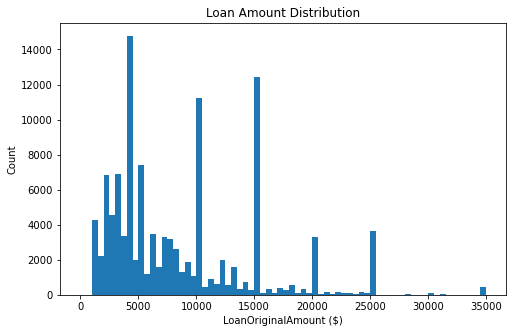

In [11]:
#further investigating
binsize = 500
bins = np.arange(0, loan_df['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount ($)')
plt.ylabel('Count')
plt.title('Loan Amount Distribution');
plt.show()

## BorrowerAPR by Year

The distributin shows that 2011 has the highest % of APR which is 0.25% and 2014 has the least APR which is about 0.17%. There is a gradual fall process from 2012 to 2014

Text(0.5, 1.0, 'Borrower APR distribution by Year')

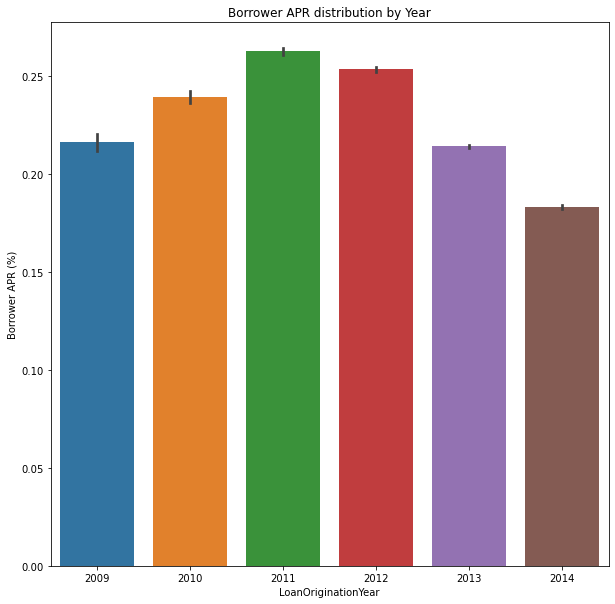

In [12]:
# A bar plot to show the average borrower Apr distribution by Year.
plt.figure(figsize = [10, 10])
sb.barplot(data=loan_df,x='LoanOriginationYear',y='BorrowerAPR')
plt.ylabel('Borrower APR (%)');
plt.title('Borrower APR distribution by Year')

##  Risk associated with loan amount

The higher the amount of loan, the lower the risk score attached. In this graph, it can be deduce that 14,000($) which is the highest has lowest risk score because the lower the risk of a borrower, the higher the chance of getting high amount of loan

Text(0.5, 1.0, 'Loan Amount per Prosper Risk Score')

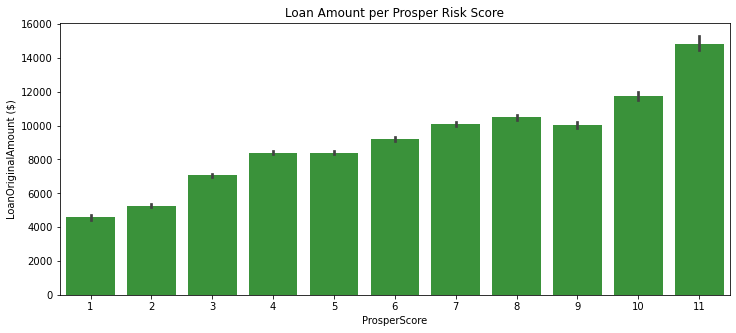

In [13]:
plt.figure(figsize=[12,5])
color = sb.color_palette()[2]
sb.barplot(data=loan_df, x='ProsperScore', y='LoanOriginalAmount', color=color)
plt.ylabel('LoanOriginalAmount ($)')
plt.title('Loan Amount per Prosper Risk Score')

## BorrowerAPR and LoanOriginalAmount correlation with the categorical variables

Borrowers most likely get access to higher loan amount if they are employed, own a home and have a high ProsperScore(low risk) because they can be able to pay back loan without defaulting. Borrowers with low BorrowerAPR

(array([0, 1]), [Text(0, 0, 'True'), Text(1, 0, 'False')])

<Figure size 864x1296 with 0 Axes>

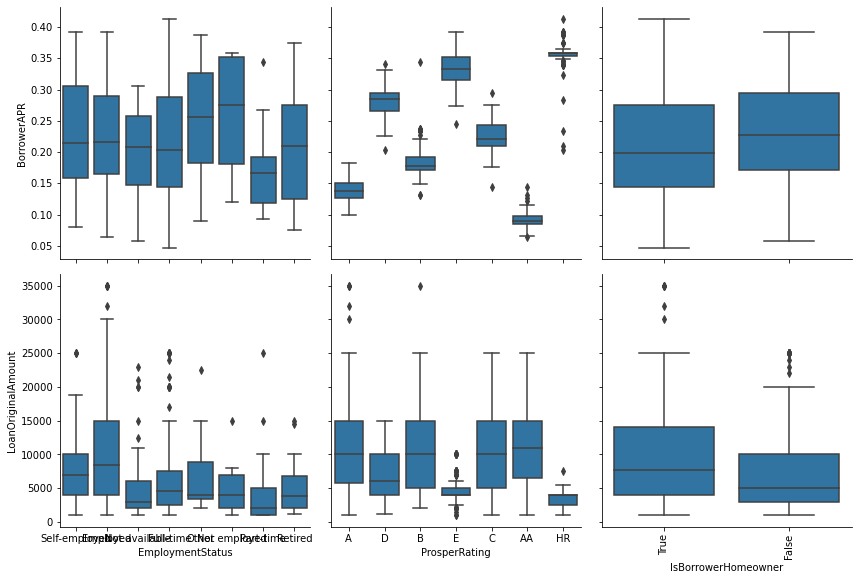

In [14]:
loan_samp = loan_df.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [12, 18])
g = sb.PairGrid(data = loan_samp, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], x_vars = ['EmploymentStatus',
    'ProsperRating','IsBorrowerHomeowner'],size=4,height = 3, aspect = 1.0)
g.map(boxgrid)
plt.xticks(rotation=90)

## Sample 1000 loan data to understand correletion between features

From the correlation plot there is a strong positive correlation between BorrowerAPR and BorrowerRate. 
There is no correlation between Term. There is no correlation between StatedMonthlyIncome and: BorrowerAPR,
EmploymentStatusDuration which further explains that no apparent relationship between two variables LoanOriginalAmount
also has no relationship with any of the predictor variables

loan_df.shape= (113937, 18)
loan_samp.shape= (1000, 18)


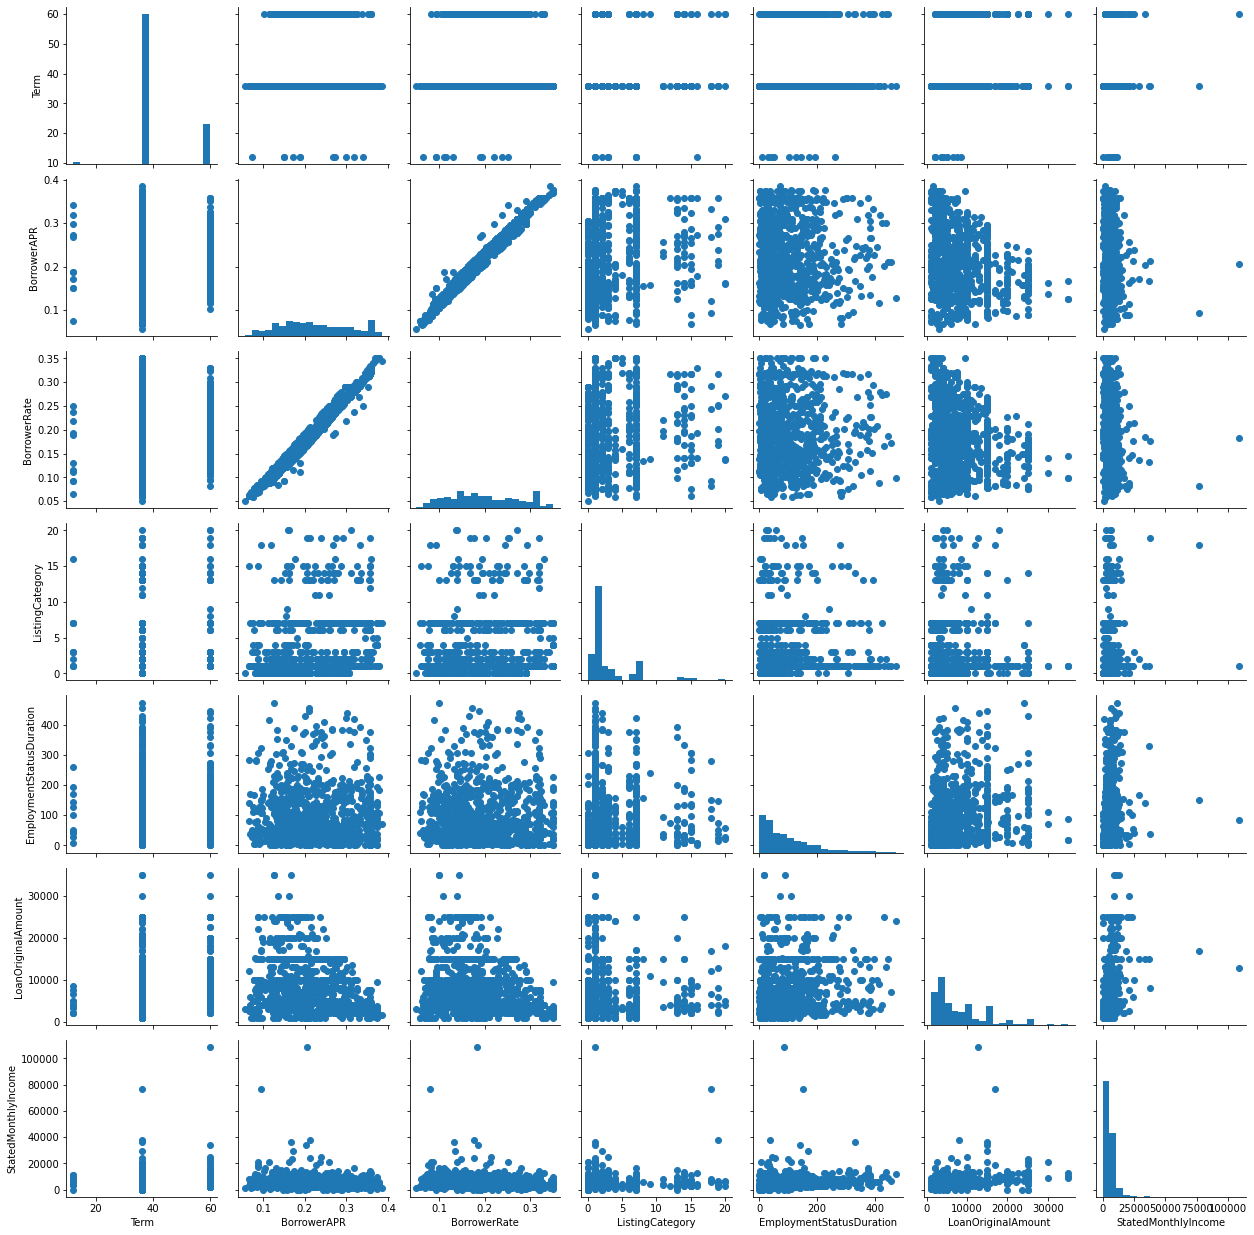

In [15]:
# plot matrix so that plots are clearer and they render faster
print("loan_df.shape=",loan_df.shape)
loan_samp = loan_df.sample(n=1000, replace = False)
numeric_vars = ['Term','BorrowerAPR','BorrowerRate','ListingCategory','EmploymentStatusDuration','LoanOriginalAmount',
                'StatedMonthlyIncome']
print("loan_samp.shape=",loan_samp.shape)

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)

In [16]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 906134 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\user\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\user\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\user\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filen